In [10]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

import pandas as pd
import seaborn as sns
import matplotlib

from statsmodels.tsa.arima.model import ARIMA
from dateutil.parser import parse

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [12]:
series = read_csv('../datasets/time_series_2019_1.csv', header=0, parse_dates=[0], index_col=0, squeeze=0)

In [13]:
print(series.head())

        sales
Month        
1-Jan  1031.8
2-Jan  5869.2
3-Jan  1051.9
4-Jan  2304.8
5-Jan  5721.8


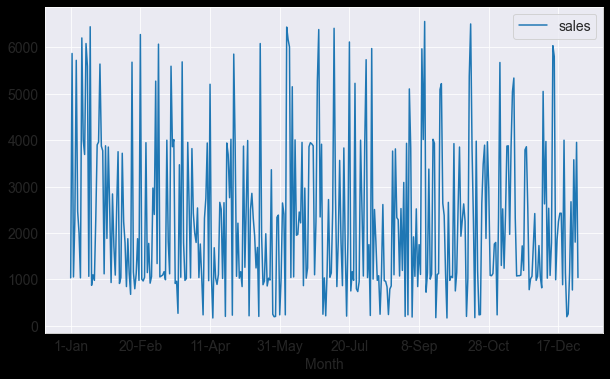

In [14]:

series.plot()
pyplot.show()

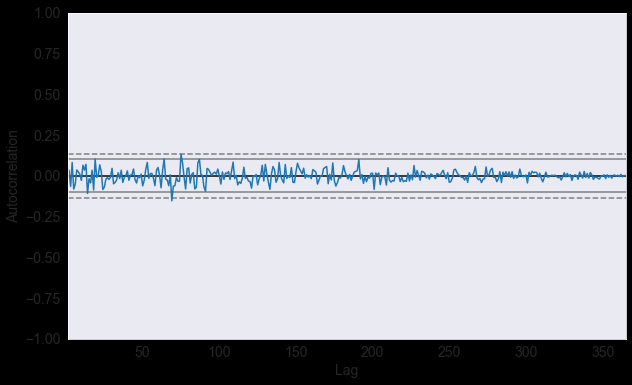

In [15]:
autocorrelation_plot(series)
pyplot.show()

In [16]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be

In [17]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3243.532
Date:                Fri, 07 Oct 2022   AIC                           6499.063
Time:                        10:18:13   BIC                           6522.446
Sample:                             0   HQIC                          6508.357
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7456      0.052    -14.332      0.000      -0.848      -0.644
ar.L2         -0.5687      0.064     -8.883      0.000      -0.694      -0.443
ar.L3         -0.4697      0.065     -7.210      0.0

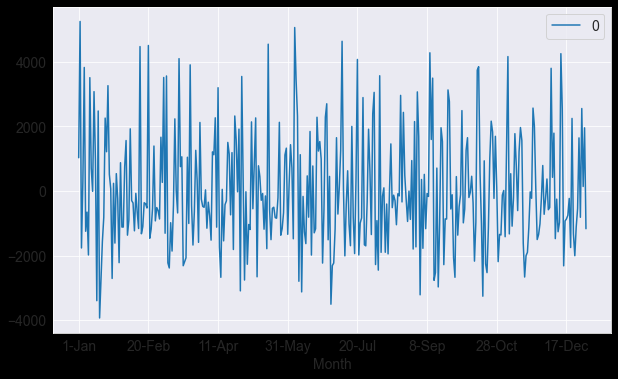

In [18]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

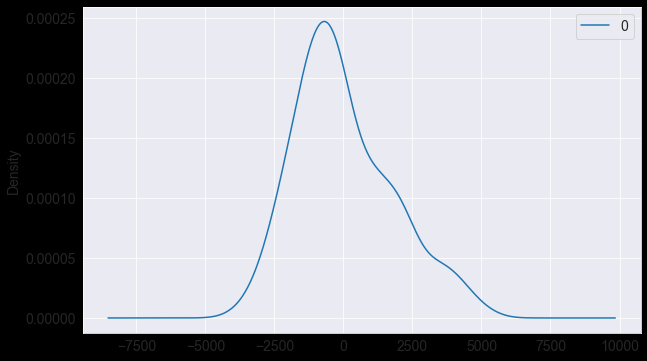

In [19]:
residuals.plot(kind = 'kde')
pyplot.show()

In [20]:
print(residuals.describe())

                 0
count   365.000000
mean     13.043909
std    1798.243746
min   -3934.185561
25%   -1233.658983
50%    -295.295834
75%    1190.284827
max    5254.608258


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [23]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predcited=%f, expected=%f' % (yhat, obs))
          

predcited=1908.500920, expected=201.000000
predcited=1919.596821, expected=3932.900000
predcited=1809.035388, expected=234.500000
predcited=2170.992203, expected=5105.400000
predcited=1814.475838, expected=3825.700000
predcited=3314.390827, expected=187.600000
predcited=1956.944387, expected=1916.200000
predcited=3000.828233, expected=1065.300000
predcited=2005.497900, expected=2519.200000
predcited=1852.260316, expected=844.200000
predcited=1855.780927, expected=1748.700000
predcited=1315.705274, expected=1105.500000
predcited=1698.166647, expected=5969.700000
predcited=1976.101269, expected=4013.300000
predcited=2942.824111, expected=6559.300000
predcited=3461.703744, expected=723.600000
predcited=4162.017065, expected=1139.000000
predcited=2909.683856, expected=3376.800000
predcited=3831.276540, expected=1005.000000
predcited=2179.084036, expected=1112.200000
predcited=2092.193797, expected=4020.000000
predcited=2166.643424, expected=3932.900000
predcited=2311.742631, expected=174.2

In [24]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1801.144


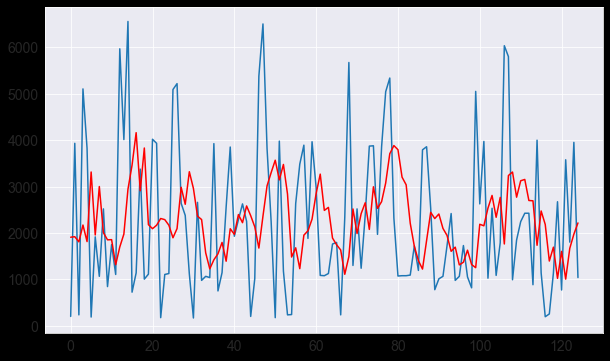

In [25]:
pyplot.plot(test)
pyplot.plot(predictions, color ='red')
pyplot.show()